# Cloudy Modeling of PDR and Dark Regions in Various Limiting Cases
## PS2 - Problem 3 - 3/4/24

Fred Angelo Batan Garcia

Worked with
Sally, Stephen, and Justin

## 1 Circumstellar Dust

__a) How will the peak temperature of the dusty envelope (in total luminosity) differ
between these two cases?__




Qualitatively, I expect in the optically thin case, for the constant density to have a lower peak luminosity, since there are more dus in the way of the first shell than in case (2), where the dust drops off $\propto r^{-2}$. 

We can think about this more qunatitatively by looking at the mass enclosed, which dictates the number of emitting grains (for a set grain mass) as a function of radius for the two density law. For the constant density law $n(r) = n_c$ and the power law density $n(r) = n_0 (r / r_0)^{-2}$.

For the constant mass we have 
$$ M(< r) = 4 \pi n_c \int r^2 \, dr = \dfrac{4}{3} \pi n_c r^3$$
For the power law density,
$$ M(< r) = 4 \pi n_0 \int \left( \dfrac{r}{r_0}\right)^{-2} r^2 \, dr =  4\pi n_0 r_0^2 r $$

Note, there is a $\propto r^3$ dependence for the constant density, while the power law density has a weaker dependence $\propto r$. So, in both cases, total luminosity as a function of radius should increase, but it should increase stronger for the constant mass shell. 

__b) How might you expect this temperature to vary for envelopes surrounding a carbon star
(such as CW Leo) and stars producing an oxygen-rich envelope?__

For a carbon star, we expect there to be more graphite (made of carbon) in the atmosphere. If it has an oxygen-rich envelope, then we expect more abundace of silicates (silicon and oxygen). 

Since the temperature (assuming both the starlight intensity parameter is the same for both and assuming ISRF) 
scales as, from Draine 24.19, 24.20:

$T_{\rm ss} \propto 16.4 (a / 0.1 \mu \rm{m})^{-1/15}, \: \text{for 0.01 $\lesssim$ a $\lesssim$ 1 $\mu$m}$ for silicates and 

$T_{\rm ss} \propto 22.3 (a / 0.1 \mu \rm{m})^{-1/40}, \: \text{for 0.005 $\lesssim$ a $\lesssim$ 0.15 $\mu$m}$ for graphite

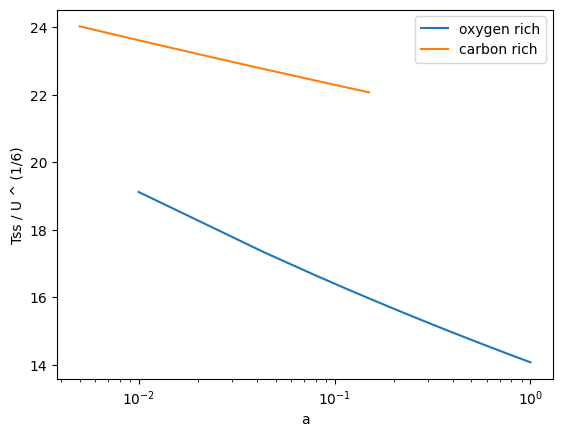

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
silicates_a = np.linspace(0.01, 1, 30)
graphite_a = np.linspace(0.005, 0.15, 30) 

plt.plot(silicates_a, 16.4 * (silicates_a / 0.1)**(-1 / 15), label = "oxygen rich")
plt.plot(graphite_a, 22.3 * (graphite_a / 0.1)**(-1 / 40), label = "carbon rich") 

plt.xlabel("a")
plt.ylabel("Tss / U ^ (1/6)")
plt.xscale("log")
plt.legend()

As you can see, the carbon rich envelope has a higher peak luminosity than the oxygen rich one. 

__c) Based on your results above, what might determine the rmin of the dusty circumstellar
envelope? (e.g. how will Tpeak vary vs. r?)__



$r_{\rm min}$ is primarily dictated by...

__d) Lastly, if the envelope is not optically thin in the UV-visible (due to dust absorption),
how will this modify your results?__

If the envelope is not optcally thin in the UV-visible -- i.e., there is dust absorption -- then this will...

## 2 Dark Cloud vs. PDR Chemistry and Cloud-Building Timescales

An initially neutral, atomic (gas phase) cloud with $n_H=10^{3.5}$ cm$^{-3}$, T=30 K, and standard ISM
abundances and dust-to-gas ratio, is in a photon-dark region (e.g. AV>5). The cloud is
exposed to a standard Galactic CR ionization rate. 

Note, we will make the following assumptions taken from chapter 16 of Draine

cosmic ionization rate $\zeta_{\rm CR} \sim 10^{-16} {\rm s^{-1}}$

$A_V \gtrsim 3$ mag, which means ionization fraction $x_e = n_e / n_{\rm H} \sim 10^{-7} \left(\dfrac{10^4 {\rm cm^{-3}}}{n_{\rm H}}\right)^{1/2}$

Also, the abundance of C in the local ISM is equal to the solar value ($\sim 2.5 \times 10^{-4}$) with gas phase abundance of $n_C / n_H \sim 10^{-4}$

__a) How long will it take for H2 to form, assuming no photo-dissociations are occurring
during this time period? (Calculate approximate formation timescale, no need to solve
diff. eq. for n(H2) fraction.)__

The rate of $H_2$ formation via grain catalysis -- which is the most common mode of grain formation in the MW is given by

$$\dfrac{dn(H_2) }{dt} = R_{\rm gr} n_{\rm H} n(H)$$
for rate coefficient  $R_{\rm gr} \sim 7.3 \times 10^{-17} \mathrm{cm}^3 \, \mathrm{s}^{-1} \left( \frac{T}{ 100 {\rm K}}\right)^{1/2} \langle \epsilon_{\rm gr}  \rangle \Sigma_{-21}$ 

and we can approximate, from Draine, $\langle \epsilon_{\rm gr} \rangle  \sim  0.08 , \Sigma_{-21} \sim 6.0$ so we get the rate to be

In [56]:
T = 30
nH = 10**3.5

secs_in_year = 3.154e+7
ft = (1 / (7.3e-17 * nH * (T/100)**0.5 *  0.08 * 6.0)) / (secs_in_year *1e6)
print("formation time scale = {:.3f} Myr".format(ft) )

formation time scale = 0.522 Myr


So, $H_2$ forms on the order of around 0.5 Myr under these approximate conditions. 

__b) Assume all hydrogen is now molecular. Using any other simplifications, how long will it
take CO to form in this dark cloud? How long will it take OH to form? What ion is
important for driving the C and O chemistry of dark clouds? Explain your assumptions
in deriving this timescale reactions and rate-limiting step. What reaction or reactions
might be rate-limiting? (As part of this, you may need to assume an electron number
density, which you can approximate as equal to the number density of the dominant ion.)__

To form CO, from Draine Ch. 33.2.1, we know that in diffuse molecular clouds, most of the gas-phase is in the form of $C^+$ and most of the H is in H$_2$. 

The reaction rate coefficient for the radiative association, which slow but steadily produces radical $ CH^+_2$ is

$C^+ + H_2 \rightarrow CH^+_2 + h\nu$ is $k_{33.6} = 5 \times 10^{-16} \left(\dfrac{T}{100}\right)^{-0.2} \, {\rm cm^3 \,s^{-1}}$

The $CH^+_2$ produced in (33.6) can also be removed by reaction with $H_2$ (rates from Woodall et al. 2007):

$CH^+_2 + H_2  \rightarrow CH_3^+ + H$, $k_{33.12} = 1.6 \times 10^{-9} {\rm cm^3 \,s^{-1}}$

The remains reacts with electrons in the following manner via dissociative recombination, __25%__ of the time

$CH^+_2 + e^- \rightarrow CH + H$, $k_{33.7} = 1.24 \times 10^{-6} \left(\dfrac{T}{100}\right)^{-0.60} \, {\rm cm^3 \,s^{-1}}$

The CH produced by dissociative recombination of $CH^+_2$ can then react with $O$ to produce $CO$ via reaction (33.8), but it is also susceptible to photoionization and photodissociation

$CH + h\nu \rightarrow CH+e^- (47 \%)$ or $C+H (53\%)$ , $k_{33.13} = 1.62 \times 10^-9 \, {\rm s^{-1}}$

The $CH$ produced by this reaction can react with $O$ to produce $CO$ via

$CH + O \rightarrow CO + H$,  $k_{33.8} = 6.6 \times 10^{-11} \,  {\rm cm^3 \,s^{-1}}$



We can examine the rate limiting steps to see which one is the slowest rate. 

__Because a reaction can occur no faster than its slowest step, the rate-determining step bottleneck limits the overall rate of a reaction__ 

Also, we'll assume all reaction are zero order-- meaning that the rate $k$ is independent of the reactant concentration.

In [57]:
nH2 = 0.5 * nH 

k336 = 5e-16 * (T / 100)**-0.2  # cm3 / s
k337 = 0.25 *  0.25 * 1.24e-6 * (T/100) **-0.6 # cm3 / s
k338 = 6.6e-11                  #cm3 / s
print("CH2+ synthesis {:.2E} cm3/s".format(k336))
print("CH synthesis {:.2E} cm3/s".format(k337))
print("CO synthesis {:.2E} cm3/s".format(k338 ))

k3312 = 1.6e-9                  
k3313 = 1.62e-9                 
print("removes CH+2 via H2 reaction {:.2E} cm3/s".format(k3312 ))
print("removes CH for COreaction {:.2E} cm3/s".format(k3313))

CH2+ synthesis 6.36E-16 cm3/s
CH synthesis 1.60E-07 cm3/s
CO synthesis 6.60E-11 cm3/s
removes CH+2 via H2 reaction 1.60E-09 cm3/s
removes CH for COreaction 1.62E-09 cm3/s


as we can see, the rate limiting reaction is the $C^+ + H_2 \rightarrow CH^+_2 + h\nu$ reaction since it has the slowest reaction of all, so we can get the formation timescale by

In [59]:
CO_per_second = k336 *nH2
t_CO = (1/CO_per_second)/ (secs_in_year *1e6)
print("{:.2E} CO produced molecules produced per second ".format(CO_per_second))
print("formation timescale of CO is {:.4f} Myr".format(t_CO ))

1.01E-12 CO produced molecules produced per second 
formation timescale of CO is 0.0315 Myr


Now on the formation of OH,

$O + H^+_3 \rightarrow OH^+ + H$, $k_{33.14} = 8.4 \times 10^{-10} \, {\rm cm^3 \,s^{-1}}$

$OH^+ + H_2 \rightarrow H_2O^+ + H $, $k_{33.15} = 1.01 \times 10^{-9} \, {\rm cm^3 \,s^{-1}}$

$H_2O^+ + e^- \rightarrow OH + H $, for 20% of the time $k_{33.16} = 4.30 \times 10^{-7} \, {\rm cm^3 \,s^{-1}}$ -->

or alternatively

$H_2O^+ + H_2 \rightarrow H_3O^+ + H $, $k_{33.17} = 6.4 \times 10^{-10} \, {\rm cm^3 \,s^{-1}}$

$H_3O^+ + e^- \rightarrow OH + H + H $, for 60% of the time $k_{33.18} = 7.48 \times 10^{-7} \left(\dfrac{T}{100}\right)^{-0.50} \, {\rm cm^3 \,s^{-1}}$

$OH$ are also destroyed via 

$$OH + h\nu \rightarrow O + H, \, k_{33.19} = 3.5 \times 10^{-10}  \, {\,s^{-1}} $$

In [51]:
k3314 = 8.4e-10
k3315 = 1.01e-9
k3316 = 4.30e-7 * 0.20

k3317 = 6.4e-10 
k3318 = 7.48e-7*(T/100)**-0.50 * 0.74
k3319 = 3.5e-10

print("OH+ synthesis", k3314)
print(k3315)
print(k3316)
print(r"$H_2O^+ + H_2 \rightarrow H_3O^+ + H $", k3317)
print(k3318)

OH+ synthesis 8.4e-10
1.01e-09
8.6e-08
$H_2O^+ + H_2 \rightarrow H_3O^+ + H $ 6.4e-10
1.0105846334341984e-06


The rate limiting is the OH+ synthesis, so this is the relevant timescale. From Indriolo et al 2007, we can say that $n(H_3^+) \sim 5\times 10^{-8} \, n_H$. We can also take into account the destruction of OH itself by subtracting.

In [58]:
nH3plus =  nH2 *5e-8
OH_per_second = (k3314 - k3319 ) * nH3plus
t_OH = (1/OH_per_second)/ (secs_in_year * 1e6)
print("{:.2E} OH produced molecules produced per second ".format(OH_per_second))
print("formation timescale of OH is {:.4f} Myr".format(t_OH ))

3.87E-14 OH produced molecules produced per second 
formation timescale of OH is 0.8185 Myr


So, we see that the OH formation timescale is lower than the CO formation timescale,__at 0.8 and 0.03 Myr, respectively.__ The important ion driving the chemistry is the $C^+$ and the rate limiting reaction is the slowest-- and therefor the most relevant -- process to take into account. 

__c) How do the above timescales compare to the cloud free-fall time (e.g. PIIM eq 41.19),
assuming that the cloud is self-gravitating?__

The free fall time is $\tau_{\rm ff} = \dfrac{4.4\times10^4 {\rm yr}}{\left(\dfrac{n_H}{10^6 {\rm cm^{-3}}}\right)}$


In [63]:
t_ff = (4.4e4 / (nH /10**6) )/ 1e6
print("free fall time is {:.2f} Myr".format(t_ff ))

free fall time is 13.91 Myr


In [64]:
print(t_ff / t_CO)
print(t_ff / t_OH)

441.39775830097676
17.000059999999998


__The free fall time for this cloud is longer than that of the CO (around 400 times longer) and OH formation (around 20 times longer) timescale__. The cloud would likely have these molecules as it collapse gravitationally, which __can aid in radiatively cooling__, making it able to achieve high enough densities for __star formation__.

__d) Two key differences between a dark cloud and a PDR are i) the presence of singly ionized C+ with n(C+)~ n(C) and ii) the fact that CO can be easily photo-dissociated in
these regions (making these regions “CO-dark”). What molecules may be produced as a
result of abundant C+ chemistry that can serve as unique tracers of PDR regions (as
opposed to dark clouds)? Where have these molecules been observed? (Briefly describe
1-2 such observations, wavelengths and the molecular transition involved, whether
rotational, vibrational or electronic.)__

More complex molecules are underabundant in PDRs. For example. molecules that are abundantly present in these PDRs are Polycyclic Aromatic Hydrocarbons (PAHs).  One well-known observation is of the Orion Bar, on eof the readings in class was a paper called __PDRs4All III: JWST’s NIR spectroscopic view of the Orion Bar__ by Peeters et al. They used JWST's NIRSpec to see in the __Aromatic Infrared Bands (AIBs)__, also revealing HeI, HI, and CI recomination lines and __seeing aromatic CH, aliphatic CH, and their CD counterparts__. They also saw some pure __rotational and rotational–vibrational transitions__ lines from $H_2$ molecules and rotational–vibrational HD, CO, and CH+, some of which have never been before observed in a PDR. Futerther more, they saw -- in the dissociation front -- a forest of __IR rotational $H_2$ and HI 21 cm emission lines__. They used the three high spectral resolution covering the __wavelength range from 0.97 to 5.27 $\mu {\rm m}$__. 

## 4 Intersellar Shocks


 Explain as
precisely as possible each of the
curves A-F in the pre-shock
density vs. velocity plot. Explain
why the curves separate distinct
regions in this plane and do your
best to explain their shape.

![alt text](p4.png "Title")

# 3 Cloudy

This notebook contains code to plot models of a photodissociation and dark region, as calculated by models hw2_pdr.in and variants. 

We will model an initial ‘fiducial’ PDR and then also explore how the structure of the PDR changes as we vary several key parameters (density, abundance, CR ionization rate).  

You already have experience varying the density in a cloudy input file.  To vary abundances we'd like to assume a constant dust-to-metals ratio, so we vary them together by setting the "metals and grains" command. (Note you should leave the grains PAH 3.0 as is.)  Similarly we vary the cosmic ray level by setting an appropriate fractional level.

Make models for 

* Density: log n = 4, 2, 6
* Metals/grains, make models for 1.0, 0.1 and 3.0 metallicity/grains
* CR, make models for 1.0, 0.001 and 1000.0   times the background Cosmic Ray density

The first of each of these is the 'fiducial' PDR. You don't need to do a full 3-d exploration of all parameters, you can explore each quantity (density, metals/grains and CR) along 1-d

Note that in all cases the PDR is set to be illuminated by a stellar blackbody with 43,600 K, log Q 49.3, but we pass the star's light through 1e23 cm2 of hydrogen to effectively extinguish H-ionizing photons.  So we are only modeling the non-ionizing PDR and dark cloud region.

As the light penetrates deeper into the region, it is attenuated by dust, and we follow the model until the attenuation reaches Av=10.  In some cases the model might stop before then (e.g. low metallicity).

Answer the following questions:

* For the fiducial PDR/dark region – how do species ionization and fractions and **molecular compositions** vary with Av?  In each region (low Av, high Av) which processes dominate the heating and cooling rates?

* How does the PDR/dark region structure (species ionization and fractions, **molecular composition** and temperature) vary as we change the key parameters?   Why would these vary in the different limiting cases?

Explain your results and make plots/figures useful for illustrating your points (see below). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import QTable, Table, Column
from astropy import units as u
from astropy.io import ascii
import pandas as pd

%matplotlib inline

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

## Functions to read model outputs

These can be used to read main cloudy input files  .ovr (overview), .mol (species densities), .col (cooling rates and fractions), .het (heating rates and fractions)

Some of these require the pandas library


In [2]:
# Functions for reading main cloudy input files  .ovr (overview), .mol (species densities), .col (cooling rates and fractions), .het (heating rates and fractions)

def read_overview(model_name,path):
    file=path+model_name+'.ovr'
    return(Table.from_pandas(pd.read_table(path+file)))

def read_molecule(model_name,path):
    file=path+model_name+'.mol'
    return(Table.from_pandas(pd.read_table(path+file)))

def read_cooling(model_name,path):
    file=path+model_name+'.col'
    with open(file) as f:
        ftable = f.readlines()
    f.close()
    rows=len(ftable)    
    
    # First find which molecule/processes are listed in the cooling table at a given radii
    coolstr=[]
    for line in ftable[1:rows]:     # skip comment header
        row = [item.strip() for item in line.split('\t')]
        lrow=len(row)
         # find process string in every other, starting at 6th column
        coolstr=np.concatenate((coolstr,np.array(row[5:lrow:2])))  

    # Make an array of the unique labels from above    
    cool_unique=np.unique(coolstr)

    # Build two arrays to contain the cooling table info, and the cooling fraction
    ulen=len(cool_unique)
    info=['depth_cm','Temp','Heat_tot','Cool_tot','NotUsed']
    coolarr_info=np.zeros((rows-1,5),dtype='float64')
    coolarr_frac=np.zeros((rows-1,ulen),dtype='float64')

    # Now cycle through file again to extract info and cooling fractions for each entry found in the table
    for line,index in zip(ftable[1:rows],np.arange(rows-1)):
        row = [item.strip() for item in line.split('\t')]
        lrow=len(row)
        coolarr_info[index,:]=np.float64(np.array(row[0:5]))
        # find process string in every other, starting at 6th column
        typestr=np.array(row[5:lrow:2])   
        # find fraction is then in every other, starting at 7th column
        val=np.float64(np.array(row[6:lrow:2]))
        for t,v in zip(typestr,val):
            p=np.argwhere(t==cool_unique)
            coolarr_frac[index,p[0]]=v

    t_cool_info=Table(coolarr_info,names=info)
    t_cool_frac=Table(coolarr_frac,names=cool_unique)
    return(t_cool_info,t_cool_frac)

def read_heating(model_name,path):
    file=path+model_name+'.het'
    with open(file) as f:
        ftable = f.readlines()
    f.close()
    # for heating, there may be more rows than we want
    init_rows=len(ftable)    
    rowflg=np.zeros(init_rows)


    # First find which molecule/processes are listed in the heating table at a given radii
    heatstr=[]
    for line,index in zip(ftable[1:init_rows],np.arange(init_rows-1)):     # skip comment header
        row = [item.strip() for item in line.split('\t')]
        lrow=len(row)
        if (lrow>5):
         # find process string in every other, starting at 6th column
            heatstr=np.concatenate((heatstr,np.array(row[5:lrow:2])))  
            rowflg[index+1]=1    # +1 to account for header line
    
    rows=np.sum(rowflg).astype("int64")
    ftable_tmp=np.array(ftable)
    p=np.where(rowflg==1)
    ftable=ftable_tmp[p[0]]   # note this table has no header
    
    # Make an array of the unique labels from above    
    heat_unique=np.unique(heatstr)

    # Build two arrays to contain the cooling table info, and the cooling fraction
    ulen=len(heat_unique)
    info=['depth_cm','Temp','Heat_tot','Cool_tot','NotUsed']
    heatarr_info=np.zeros((rows,5),dtype='float64')    # slightly different from cool arr since no header
    heatarr_frac=np.zeros((rows,ulen),dtype='float64')   # slightly different from cool arr since no header


    # Now cycle through file again to extract info and cooling fractions for each entry found in the table
    for line,index in zip(ftable[0:rows],np.arange(rows)):
        row = [item.strip() for item in line.split('\t')]
        lrow=len(row)
        heatarr_info[index,:]=np.float64(np.array(row[0:5]))
        # find process string in every other, starting at 6th column
        typestr=np.array(row[5:lrow:2])   
        # find fraction is then in every other, starting at 7th column
        val=np.float64(np.array(row[6:lrow:2]))
        for t,v in zip(typestr,val):
            p=np.argwhere(t==heat_unique)
            heatarr_frac[index,p[0]]=v

    t_heat_info=Table(heatarr_info,names=info)
    t_heat_frac=Table(heatarr_frac,names=heat_unique)
    return(t_heat_info,t_heat_frac)


## Example code for reading model outputs

In [3]:
model_name='ps2_pdr_fiducial'
path='./'

t_ovr=read_overview(model_name,path)
t_mol=read_molecule(model_name,path)
t_cool_info,t_cool_frac=read_cooling(model_name,path)
t_heat_info,t_heat_frac=read_heating(model_name,path)


## Example function for making a fractional rate plot

In [4]:
def frac_stackplot(t_frac,x,xlabel,title):

    cm = plt.get_cmap('gist_rainbow')
    y=np.lib.recfunctions.structured_to_unstructured(t_frac.as_array())

    labels=t_frac.colnames
    nlabel=len(labels)

    plt.figure(figsize=(9,6))


    plt.stackplot(x,np.transpose(y),labels=labels,colors=cm(np.arange(len(labels))/len(labels)))
    plt.legend()
    plt.xlabel(xlabel)
    plt.title(title)
    plt.ylabel('Fraction')
    #plt.xscale("log")
    #plt.yscale("log")
    plt.show()


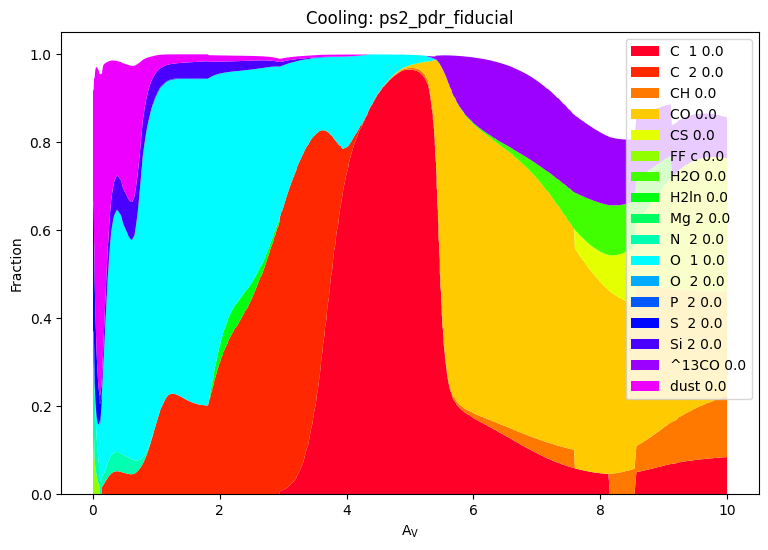

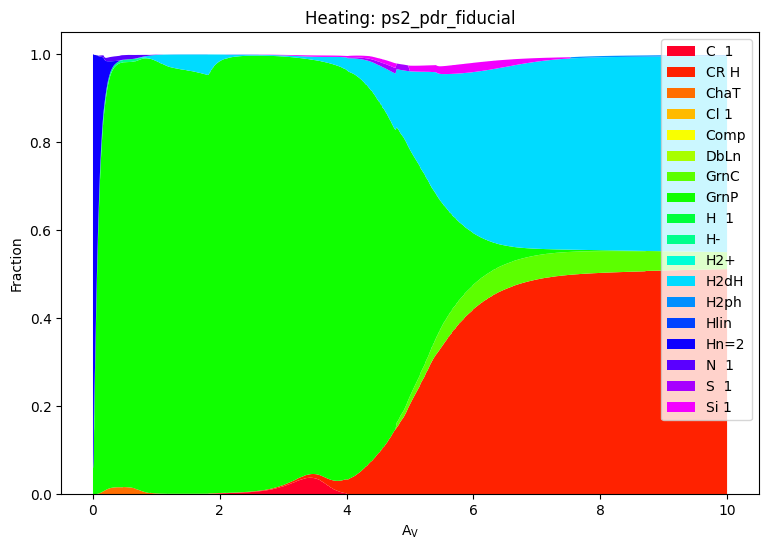

In [5]:
#x=t_cool_info['depth_cm'].data
x=t_ovr['AV(point)'].data
frac_stackplot(t_cool_frac,x,'$A_V$','Cooling: '+model_name)    
frac_stackplot(t_heat_frac,x,'$A_V$','Heating: '+model_name)

## Plot Te, ne vs. Av

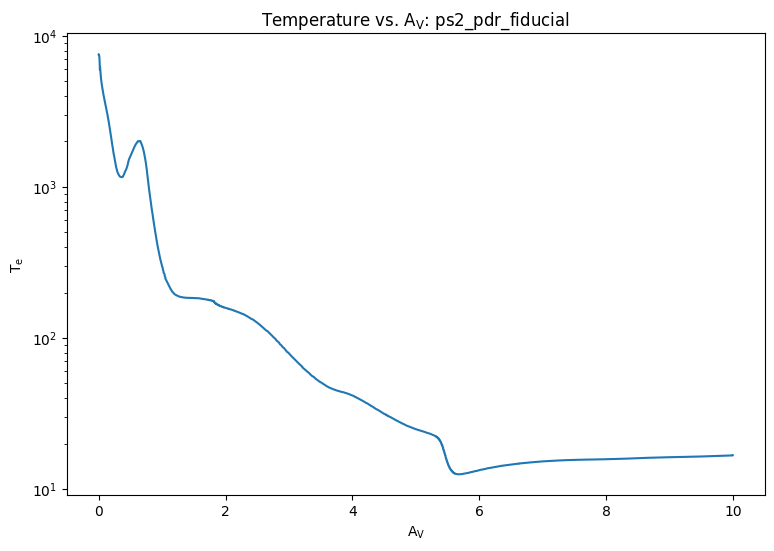

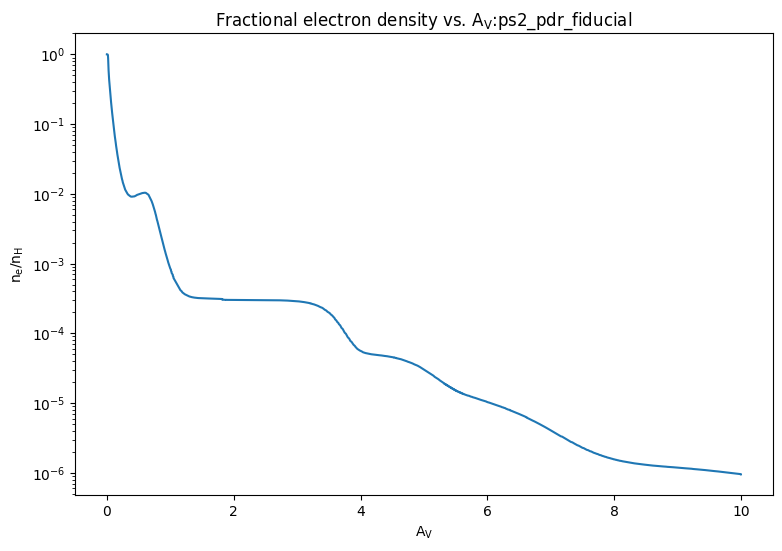

In [6]:
plt.figure(figsize=(9,6))
plt.plot(t_ovr['AV(point)'],t_ovr['Te'])
plt.yscale("log")
plt.ylabel("$T_e$")
plt.xlabel("$A_V$")
plt.title("Temperature vs. A$_V$: "+model_name)
plt.show()

plt.figure(figsize=(9,6))
plt.plot(t_ovr['AV(point)'],t_ovr['eden']/t_ovr['hden'])
plt.yscale("log")
plt.ylabel("$n_e/n_H$")
plt.xlabel("$A_V$")
plt.title("Fractional electron density vs. A$_V$:"+model_name)
plt.show()




In [7]:
print(t_mol.colnames)

['#depth', 'AV(point)', 'AV(extend)', 'CO diss rate', 'C recom rate', 'H', 'H+', 'H-', 'H2', 'H2*', 'H2+', 'H3+', 'He', 'He+', 'HeH+', 'Li', 'Li+', 'Li-', 'LiH', 'LiH+', 'B', 'B+', 'C', 'C+', 'C+2', 'CH', 'CH+', 'CH2', 'CH2+', 'CH3', 'CH3+', 'CH4', 'CH4+', 'CH5+', 'C2', 'C2+', 'C2H', 'C2H+', 'C2H2', 'C2H2+', 'C2H3+', 'C3', 'C3+', 'C3H', 'C3H+', 'N', 'N+', 'N+2', 'NH', 'NH+', 'NH2', 'NH2+', 'NH3', 'NH3+', 'NH4+', 'CN', 'CN+', 'HCN', 'HCN+', 'HNC', 'HCNH+', 'HC3N', 'N2', 'N2+', 'N2H+', 'O', 'O+', 'O+2', 'OH', 'OH+', 'OHgrn', 'H2O', 'H2O+', 'H2Ogrn', 'H3O+', 'CO', 'CO+', 'COgrn', 'HCO+', 'H2CO', 'NO', 'NO+', 'HNO', 'HNO+', 'OCN', 'OCN+', 'N2O', 'O2', 'O2+', 'NO2', 'NO2+', 'F', 'F+', 'HF', 'HF+', 'H2F+', 'CF+', 'Ne', 'Ne+', 'NeH+', 'Na', 'Na+', 'Mg', 'Mg+', 'Al', 'Al+', 'Si', 'Si+', 'SiH', 'SiH2+', 'SiN', 'SiN+', 'SiO', 'SiO+', 'SiOH+', 'P', 'P+', 'S', 'S+', 'S+2', 'HS', 'HS+', 'CS', 'CS+', 'HCS+', 'NS', 'NS+', 'SO', 'SO+', 'OCS', 'OCS+', 'SO2', 'SiS', 'S2', 'S2+', 'Cl', 'Cl+', 'HCl', 'HCl

## Plot species/ion fractions

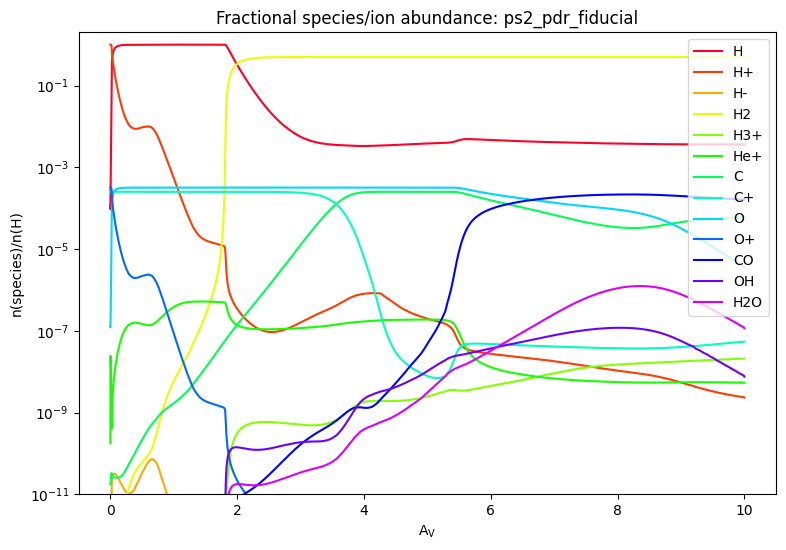

In [8]:
# This is an example of species to plot, you might want to select others from above!
pltspecies=['H','H+','H-','H2','H3+','He+','C','C+','O','O+','CO','OH','H2O']
nspecies=len(pltspecies)

cm = plt.get_cmap('gist_rainbow')
colors=cm(np.arange(nspecies)/nspecies)

plt.figure(figsize=(9,6)) 
for species,color in zip(pltspecies,colors):
    plt.plot(t_mol['AV(point)'],t_mol[species]/t_ovr['hden'],label=species,color=color)
   
plt.legend()
plt.yscale("log")
plt.xlabel("$A_V$")
plt.ylabel("n(species)/n(H)")
plt.title("Fractional species/ion abundance: "+model_name)
#plt.xlim((2,5))
plt.ylim((1e-11,2))
plt.show()

